# Guided and Leaky modes of slab waveguide

Using Z plane only functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex
from scipy.optimize import newton
from IPython.display import Video
plt.style.use('dark_background')
%matplotlib widget


In [2]:
A = SlabExact(symmetric=True)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

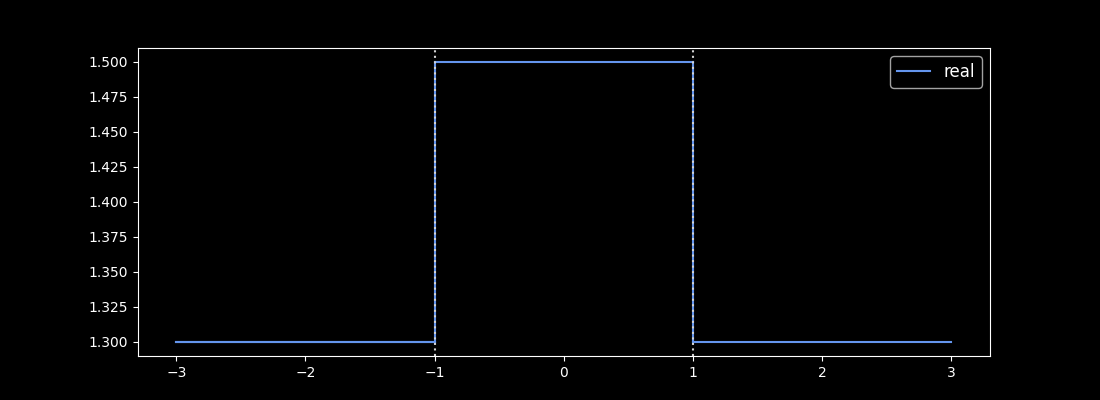

In [3]:
A.plot_refractive_index()

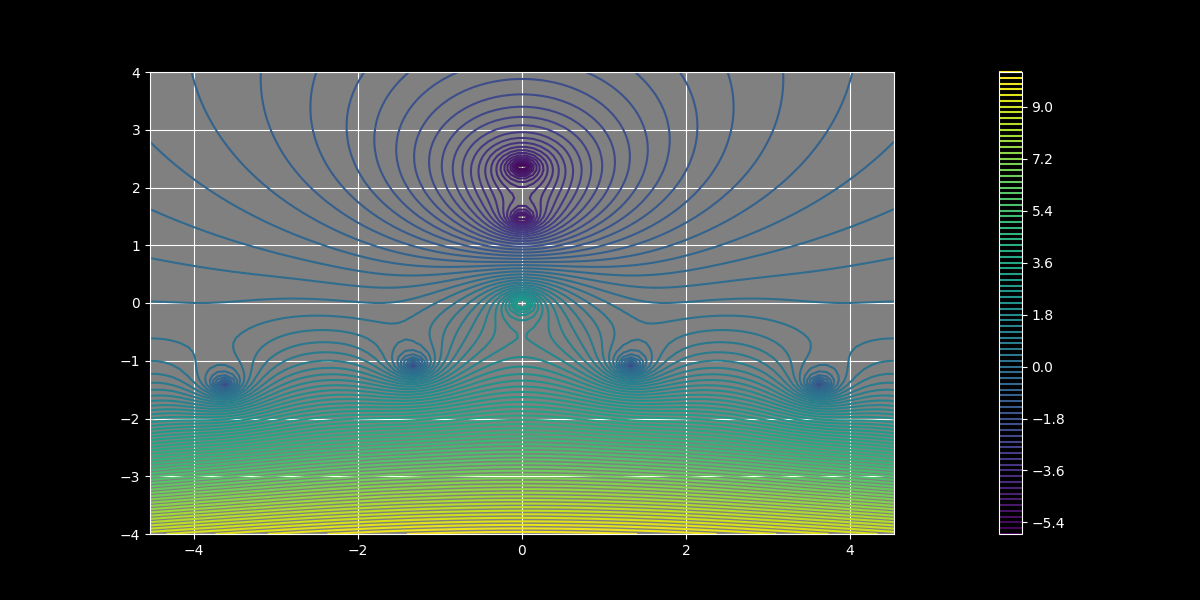

In [4]:
plot_complex(A.determinant, -A.K_low, A.K_low, -4, 4, iref=100, rref=100,levels=100)

In [17]:
Z1 = newton(A.determinant, np.array(1.25j))[0]
Z2 = newton(A.determinant, np.array(2.5j))[0]

Z1, Z2

((7.844772435750226e-17+1.4619193679047182j),
 (5.391945840818086e-17+2.357314065704685j))

In [18]:
F1 = A.fields(Z1)
F2 = A.fields(Z2)

In [19]:
xs = np.linspace(-5, 5, 1000)

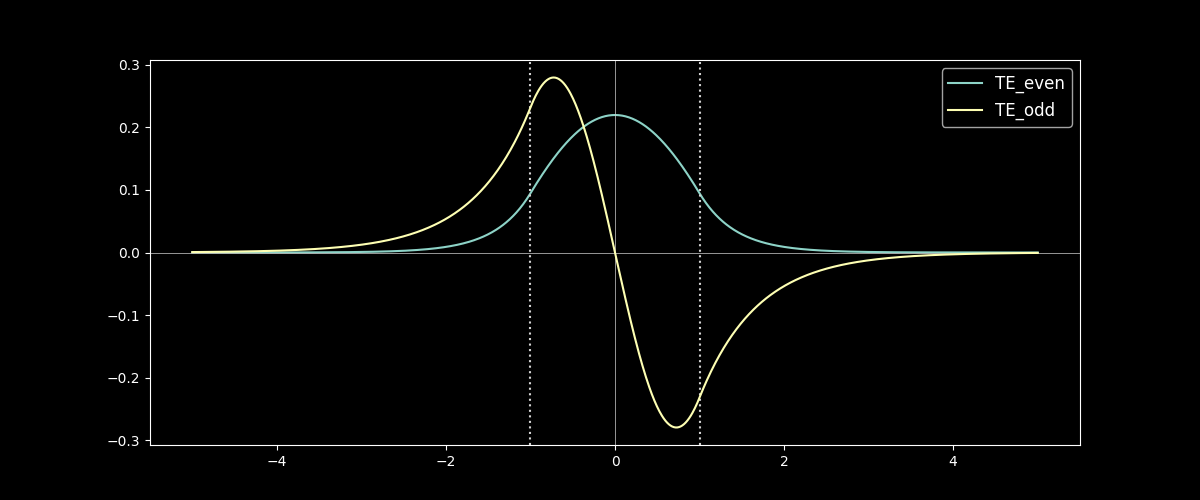

In [24]:
A.plot_field_1d(F2, xs=xs, label='TE_even')
A.add_1d_plot(F1, xs=xs, label='TE_odd')


# Leaky Modes

Right, we see both leaky and guided modes simultaneously in Z plane.

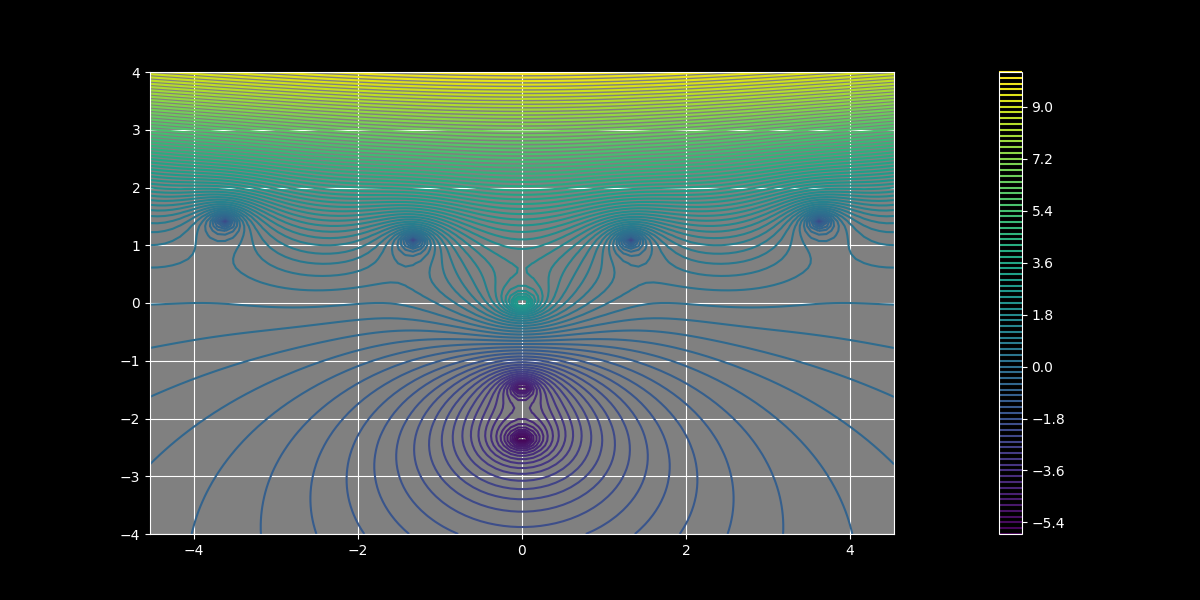

In [30]:
plot_complex(A.determinant, -A.K_low, A.K_low, -4, 4, fkwargs={'mode_type':'leaky'}, iref=100, rref=100, levels=100)

In [31]:
Z3 = newton(A.determinant, np.array([1.6+1.25j]), args=(None, 'Z', field_type, 'leaky'))[0]
Z3

(1.3214243193987298+1.0885082804866286j)

In [32]:
F3 = A.fields(Z3, mode_type='leaky')

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

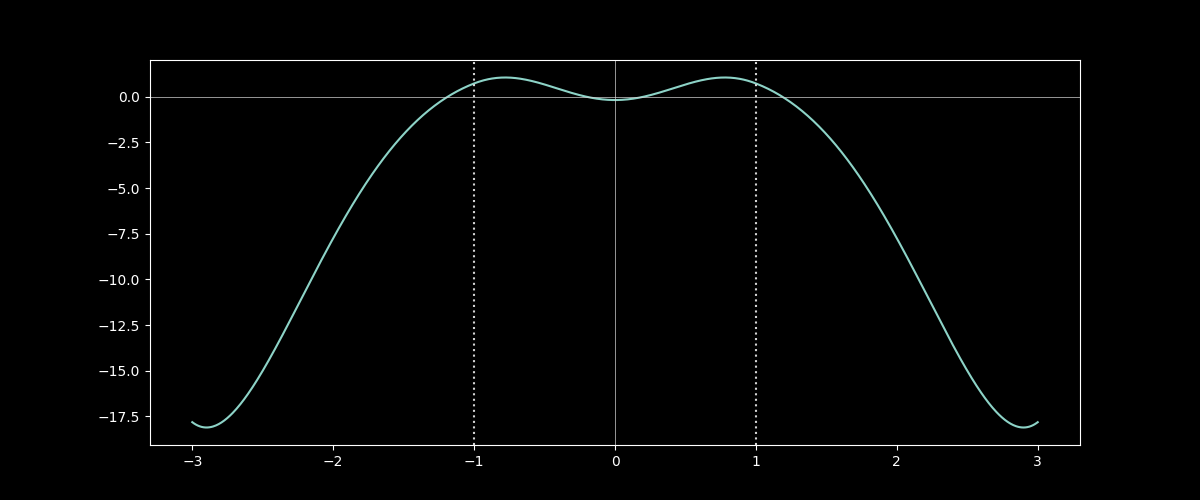

In [33]:
A.plot_field_1d(F3)